In [38]:
import cv2

## Camera로 영상 재생

In [33]:
cap = cv2.VideoCapture(0)

if cap.isOpened():  # 카메라가 작동한다면
    # cap.get(prodId)/cap.set(propId, value)을 통해서 속성 변경이 가능.
    # 3은 width, 4는 heigh
    print("before")
    print('width: {0}, height: {1}'.format(cap.get(3), cap.get(4)))
    cap.set(3, 320)  # width를 320
    cap.set(4, 240)  # height를 240으로 조정
    print("after")
    print('width: {0}, height: {1}'.format(cap.get(3), cap.get(4)))
    
    while(True):
        # ret : frame capture결과(boolean)
        # frame : Capture한 frame
        ret, frame = cap.read()

        if (ret):  # 영상을 정상적으로 받았다면
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # 영상을 GrayScale로 변환
            cv2.imshow("original", frame)
            cv2.imshow('gray', gray)
            
            if cv2.waitKey(1) == ord('q'):
                break

    cap.release() # VideoCapture를 닫고 메모리 해제
    cv2.destroyAllWindows()

before
width: 640.0, height: 480.0
after
width: 320.0, height: 240.0


#### *cap.get(ID) return*

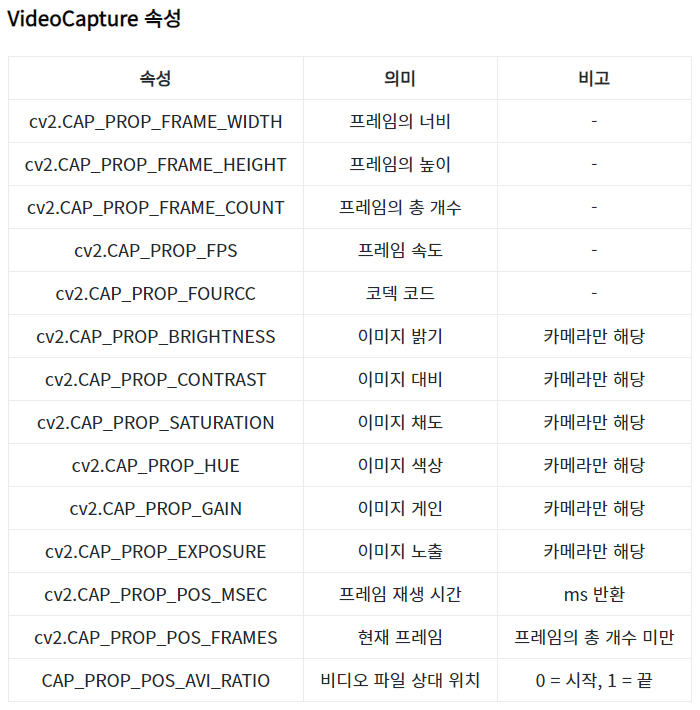

---
## File로 영상 재생

In [25]:
cap = cv2.VideoCapture("video.mp4")

while(True):
    ret, frame = cap.read()
    current_time = time.time() - prev_time

    if (ret):
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # 영상을 GrayScale로 변환
        cv2.imshow("original", frame)
        cv2.imshow('gray', gray)
    
    if cv2.waitKey(33) == ord('q'): # 33ms 마다 프레임을 재생함, 작으면 빠르게 재생됨
        break

cap.release()
cv2.destroyAllWindows()

In [29]:
# 원하는 FPS로 재생하기
import time

cap = cv2.VideoCapture("video.mp4")
prev_time = 0
FPS = 15 # 원하는 FPS

while(True):
    ret, frame = cap.read()
    current_time = time.time() - prev_time

    if (ret is True) and (current_time > 1./ FPS) :
        prev_time = time.time()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
        cv2.imshow("original", frame)
        cv2.imshow('gray', gray)
        
    if cv2.waitKey(33) == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [28]:
# 동영상 무한 반복
cap = cv2.VideoCapture("video.mp4")
prev_time = 0
FPS = 33

while(True):
    # 현재 프레임이 마지막 프레임이라면, 다시 open
    if(cap.get(cv2.CAP_PROP_POS_FRAMES) == cap.get(cv2.CAP_PROP_FRAME_COUNT)):
        cap.open("video.mp4")
        
    ret, frame = cap.read()
    current_time = time.time() - prev_time

    if (ret is True) and (current_time > 1./ FPS) :
        prev_time = time.time()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow("original", frame)
        cv2.imshow('gray', gray)
        
    if cv2.waitKey(33) == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

---
## 영상 저장하기
### cv2.VideoWriter(outputFile, fourcc, frame, size)
- fourcc : codec정보
- frame : 초당 저장될 frame
- size : 영상의 크기

In [37]:
cap = cv2.VideoCapture(0)

fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('output.avi', fourcc, 30, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    
    if ret:
        frame = cv2.flip(frame, 0) # 이미지 반전 0: 상하, 1: 좌우
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        out.write(frame) # 저장
        cv2.imshow('frame', frame)
        
        if cv2.waitKey(1) == ord('q'):
            break
    else:
        break
cap.release()
out.release()
cv2.destroyAllWindows()
    